# Commit Embedding Clusters Visualization

This projects compresses information contained in the embedding vector of commit messages generated by a commit classification model using MLP and visualizes the processed vectors.

In [1]:
## Installing 
!pip install torch
!pip install numpy
!pip install matplotlib seaborn scikit-learn



## Initialization

Initializing MLP network and load embedding vectors

In [2]:
import torch
import torch.nn as nn
import numpy as np

mlp = nn.Sequential(
    nn.Linear(768, 512),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Linear(256, 64)
)

In [3]:
npy_path = 'embedding/embeddings.npy'
embeddings = np.load(npy_path)

embeddings.shape

(10741, 768)

convert embeddings to PyTorch tensor

In [4]:
embeddings_tensor = torch.from_numpy(embeddings).float()

## Feed Embeddings through MLP

In [5]:
with torch.no_grad():
    compressed_embeddings = mlp(embeddings_tensor)
compressed_embeddings.shape
## Clustering






torch.Size([10741, 64])

## Visualization using t-SNE

/var/folders/hq/mr_d9f8x11dfzc_f03z9xzbw0000gn/T/ipykernel_87876/1117873560.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=embeddings_2d[:, 0],
/var/folders/hq/mr_d9f8x11dfzc_f03z9xzbw0000gn/T/ipykernel_87876/1117873560.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=initial_embeddings_2d[:, 0],


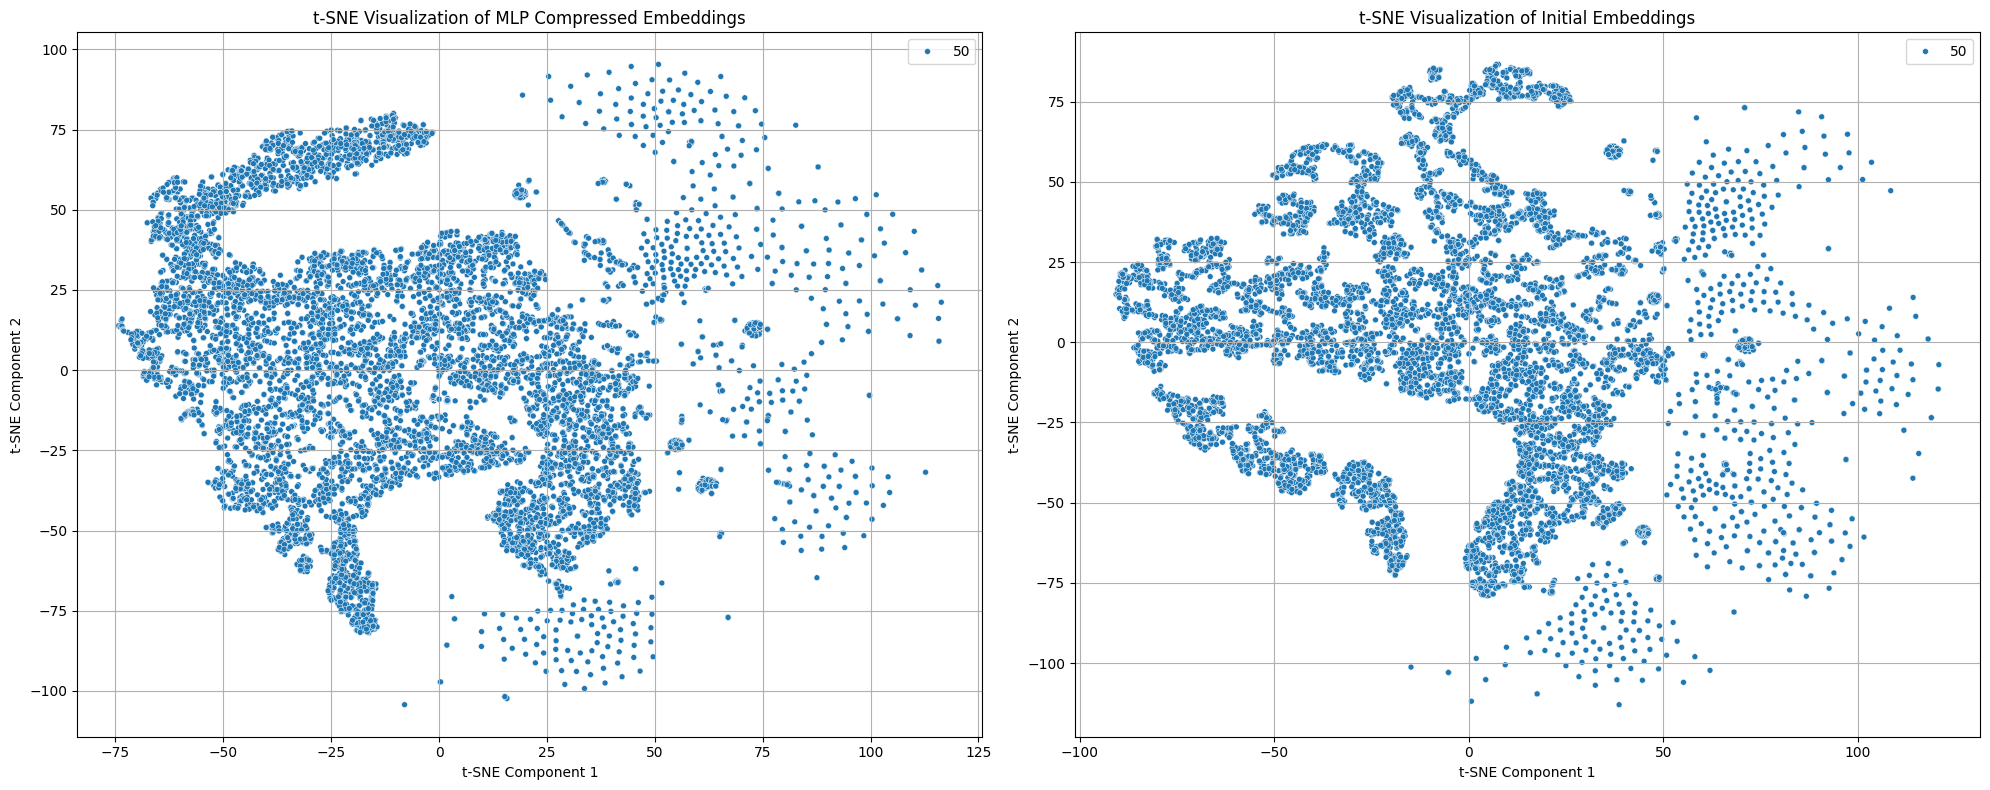

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Reduce the dimensions of the compressed embeddings to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(compressed_embeddings)

# Plot compressed embeddings
sns.scatterplot(x=embeddings_2d[:, 0], 
                y=embeddings_2d[:, 1], 
                palette='viridis',
                size=50,
                ax=ax1)
ax1.set_title('t-SNE Visualization of MLP Compressed Embeddings')
ax1.set_xlabel('t-SNE Component 1')
ax1.set_ylabel('t-SNE Component 2')
ax1.grid(True)

# Plot initial embeddings
initial_tsne = TSNE(n_components=2, random_state=42)
initial_embeddings_2d = initial_tsne.fit_transform(embeddings_tensor)

sns.scatterplot(x=initial_embeddings_2d[:, 0], 
                y=initial_embeddings_2d[:, 1], 
                palette='coral',
                size=50,
                ax=ax2)
ax2.set_title('t-SNE Visualization of Initial Embeddings')
ax2.set_xlabel('t-SNE Component 1')
ax2.set_ylabel('t-SNE Component 2')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [7]:
# Save compressed embeddings
compressed_embeddings_np = compressed_embeddings.numpy()
np.save('embedding/compressed_embeddings.npy', compressed_embeddings_np)



## Visualization using UMAP


In [11]:
import umap
reducer = umap.UMAP()
reduced_compressed_embeddings = reducer.fit_transform(compressed_embeddings_np)
reduced_initial_embeddings = reducer.fit_transform(embeddings_tensor)

/Users/savirarama/Documents/Embedding-Clustering-Visualization/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/savirarama/Documents/Embedding-Clustering-Visualization/.venv/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/savirarama/Documents/Embedding-Clustering-Visualization/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


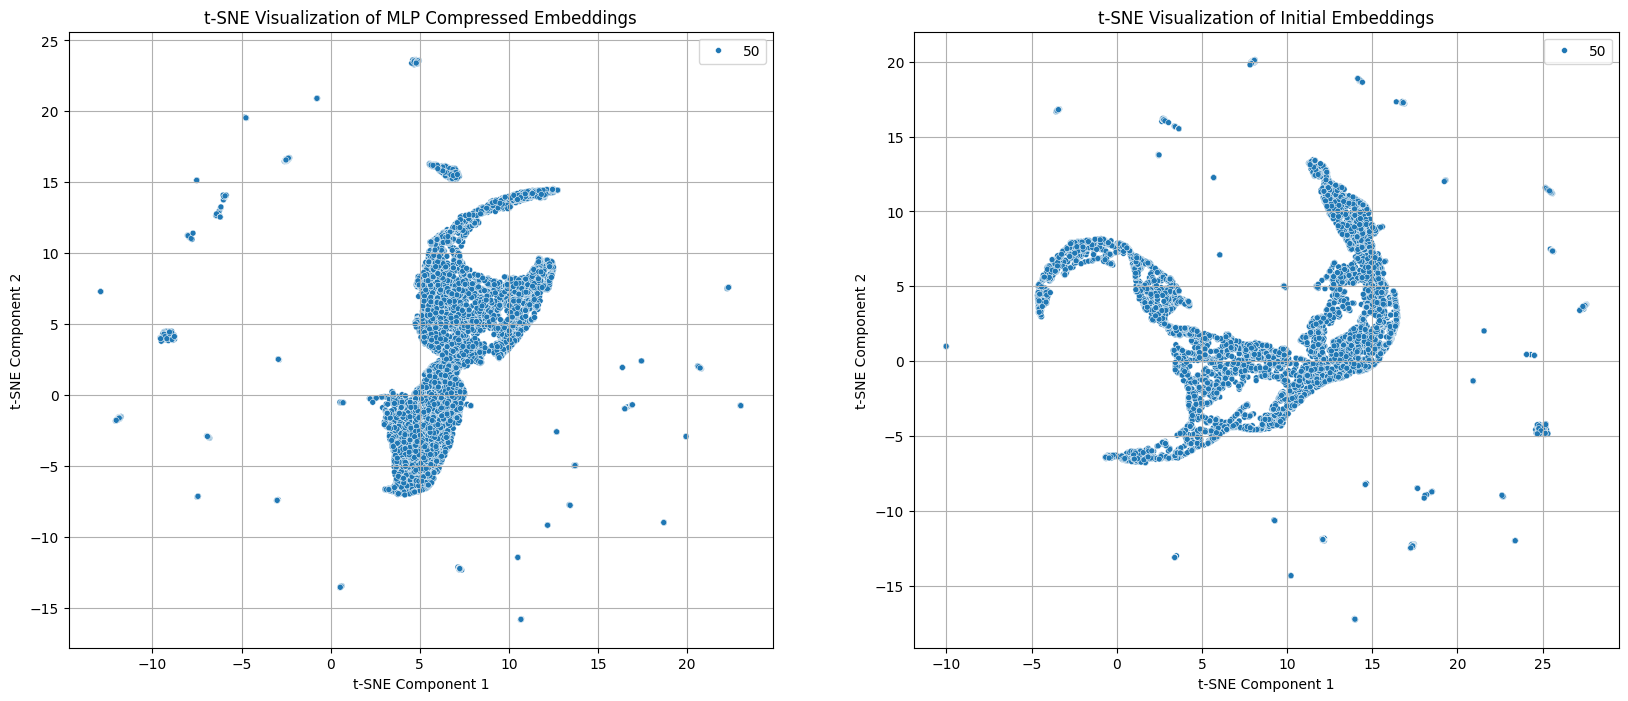

In [13]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot compressed embeddings
sns.scatterplot(x=reduced_compressed_embeddings[:, 0], 
                y=reduced_compressed_embeddings[:, 1], 
                size=50,
                ax=ax1)
ax1.set_title('t-SNE Visualization of MLP Compressed Embeddings')
ax1.set_xlabel('t-SNE Component 1')
ax1.set_ylabel('t-SNE Component 2')
ax1.grid(True)

# Plot compressed embeddings
sns.scatterplot(x=reduced_initial_embeddings[:, 0], 
                y=reduced_initial_embeddings[:, 1], 
                size=50,
                ax=ax2)
ax2.set_title('t-SNE Visualization of Initial Embeddings')
ax2.set_xlabel('t-SNE Component 1')
ax2.set_ylabel('t-SNE Component 2')
ax2.grid(True)